Class Labels

Number of Doctors Visited: The total count of different doctors the patient has seen = {
 1: 0-1 doctors
 2: 2-3 doctors
 3: 4 or more doctors
}

Age: The patient's age group = {
 1: 50-64
 2: 65-80
}

Physical Health: A self-assessment of the patient's physical well-being = {
 -1: Refused
 1: Excellent
 2: Very Good
 3: Good
 4: Fair
 5: Poor
}

Mental Health: A self-evaluation of the patient's mental or psychological health = {
 -1: Refused
 1: Excellent
 2: Very Good
 3: Good
 4: Fair
 5: Poor
}

Dental Health: A self-assessment of the patient's oral or dental health= {
 -1: Refused
 1: Excellent
 2: Very Good
 3: Good
 4: Fair
 5: Poor
}

Employment: The patient's employment status or work-related information = {
 -1: Refused 6
 1: Working full-time
 2: Working part-time
 3: Retired
 4: Not working at this time
}

Stress Keeps Patient from Sleeping: Whether stress affects the patient's ability to sleep = {
 0: No
 1: Yes
}

Medication Keeps Patient from Sleeping: Whether medication impacts the patient's sleep = {
 0: No
 1: Yes
}

Pain Keeps Patient from Sleeping: Whether physical pain disturbs the patient's sleep = {
 0: No
 1: Yes
}

Bathroom Needs Keeps Patient from Sleeping: Whether the need to use the bathroom affects the patient's sleep = {
 0: No
 1: Yes
}

Unknown Keeps Patient from Sleeping: Unidentified factors affecting the patient's sleep = {
 0: No
 1: Yes
}

Trouble Sleeping: General issues or difficulties the patient faces with sleeping = {
 0: No
 1: Yes
}

Prescription Sleep Medication: Information about any sleep medication prescribed to the patient = {
 -1: Refused
 1: Use regularly
 2: Use occasionally
 3: Do not use
}

Race: The patient's racial or ethnic background = {
 -2: Not asked
 -1: REFUSED
 1: White, Non-Hispanic
 2: Black, Non-Hispanic
 3: Other, Non-Hispanic
 4: Hispanic
 5: 2+ Races, Non-Hispanic
}
Gender: The gender identity of the patient = {
 -2: Not asked
 -1: REFUSED
 1: Male
 2: Female
}

In [ ]:
!pip install scikit-optimize

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, classification_report, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/NPHA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [ ]:
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


In [ ]:
print(df.head(6))

   Number of Doctors Visited  Age  Phyiscal Health  Mental Health  \
0                          3    2                4              3   
1                          2    2                4              2   
2                          3    2                3              2   
3                          1    2                3              2   
4                          3    2                3              3   
5                          2    2                3              2   

   Dental Health  Employment  Stress Keeps Patient from Sleeping  \
0              3           3                                   0   
1              3           3                                   1   
2              3           3                                   0   
3              3           3                                   0   
4              3           3                                   1   
5              4           3                                   0   

   Medication Keeps Patient from Sleepi

In [ ]:
df.isnull().sum()

# Filter out the rows with values -1 or -2 in the features.
for _, col in enumerate(df.columns):
    count = df[col].isin([-1, -2]).sum()
    print(col, count)
    df = df[~df[col].isin([-1, -2])]

Number of Doctors Visited 0
Age 0
Phyiscal Health 1
Mental Health 10
Dental Health 3
Employment 0
Stress Keeps Patient from Sleeping 0
Medication Keeps Patient from Sleeping 0
Pain Keeps Patient from Sleeping 0
Bathroom Needs Keeps Patient from Sleeping 0
Uknown Keeps Patient from Sleeping 0
Trouble Sleeping 2
Prescription Sleep Medication 2
Race 0
Gender 0


In [ ]:
class_distribution = df['Number of Doctors Visited'].value_counts()
print(class_distribution)

Number of Doctors Visited
2    363
3    207
1    126
Name: count, dtype: int64


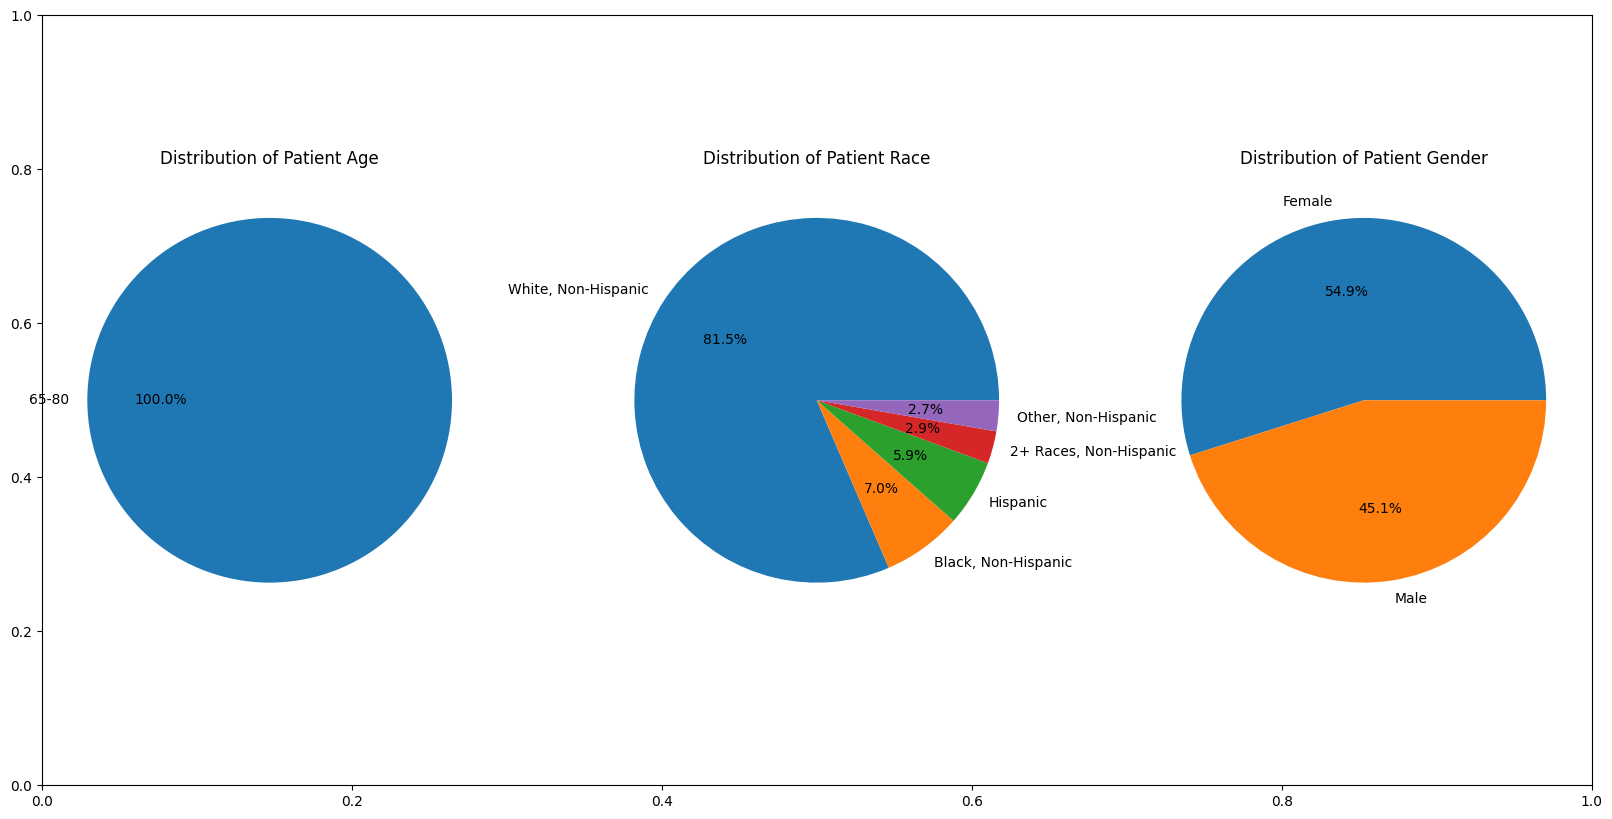

In [ ]:
df_ = df.copy()

age_dict = { 1: "50-64", 2: "65-80" }
df_['Age'] = df_['Age'].map(age_dict)

race_dict = { 1: "White, Non-Hispanic", 2: "Black, Non-Hispanic", 3: "Other, Non-Hispanic", 4: "Hispanic", 5: "2+ Races, Non-Hispanic" }
df_['Race'] = df_['Race'].map(race_dict)

gender_dict = { 1: "Male", 2: "Female" }
df_['Gender'] = df_['Gender'].map(gender_dict)

plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Age', 'Race' , 'Gender']):
    plt.subplot(1, 3, i + 1)

    x = df_[col].value_counts()
    plt.title('Distribution of Patient ' + col)
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()


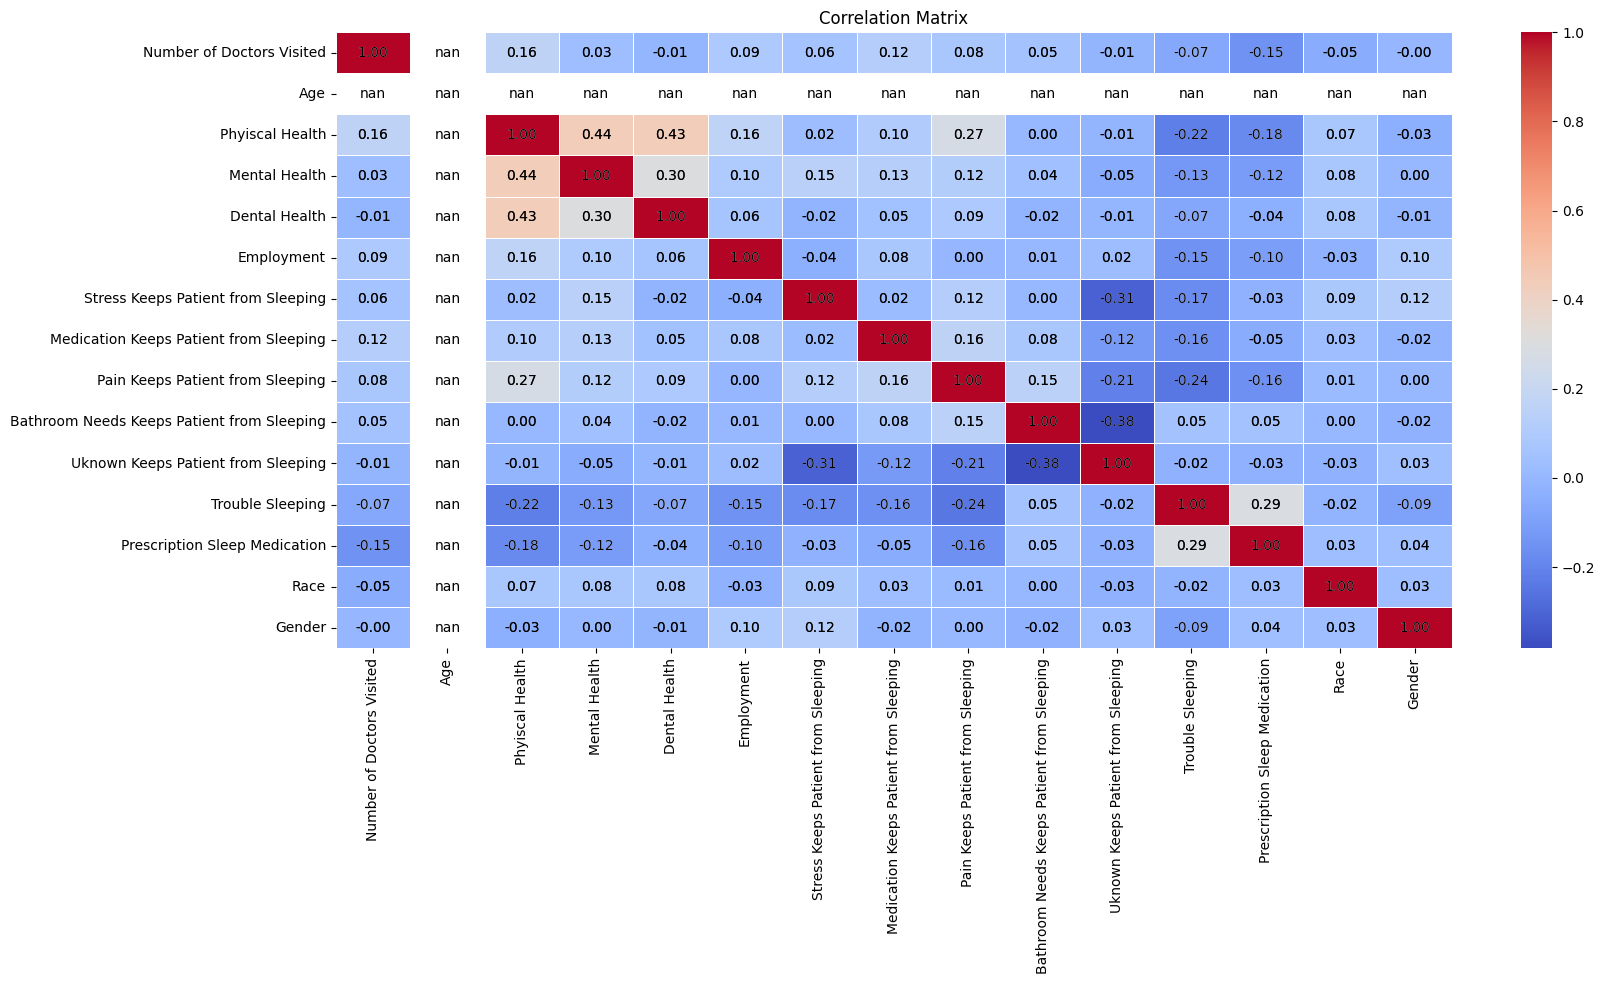

In [ ]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Add annotations to the heatmap
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = f"{corr_matrix.iloc[i, j]:.2f}"
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.title("Correlation Matrix")
plt.show()


<Figure size 1000x600 with 0 Axes>

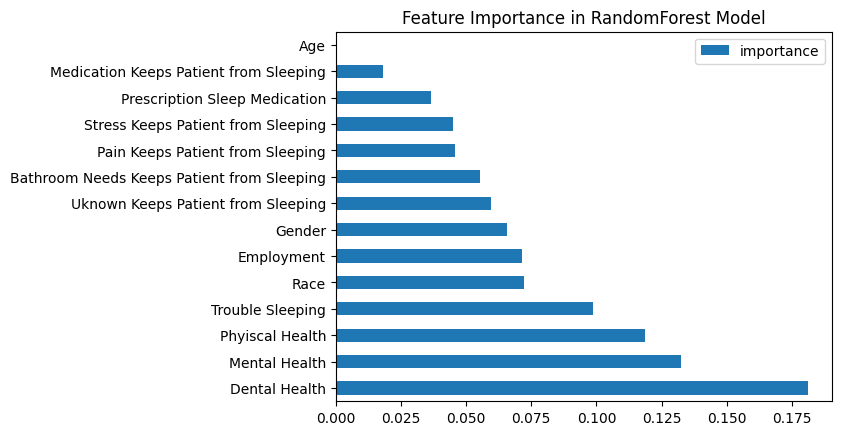

In [ ]:
X = df.drop('Number of Doctors Visited', axis=1)
y = df['Number of Doctors Visited']

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importance in RandomForest Model')
plt.show()

In [ ]:
# We will drop the Age feature as it has 0 importances.
columns_to_drop = ['Age']
X = X.drop(columns=columns_to_drop)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({2: 289, 3: 289, 1: 289})


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print evaluation results
    print("Confusion Matrix:\n", matrix)
    print("Classification Report:\n", class_report)

In [ ]:
X_scaled = np.vstack((X_train_scaled, X_test_scaled))
y = np.concatenate((y_train_resampled, y_test))

# Initializing Models
models = {
    "LogisticRegression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(kernel ='linear'),
    "DecisionTree": DecisionTreeClassifier()
}

cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]

    # Evaluate the model's accuracy using cross-validation
    accuracies = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

    print("*", model_name)
    print("Average accuracy:", np.mean(accuracies))

    model.fit(X_train_scaled, y_train_resampled)
    evaluate(model, X_test_scaled, y_test)

* LogisticRegression
Average accuracy: 0.47058415841584156
Confusion Matrix:
 [[ 8 10  5]
 [23 26 25]
 [13 17 13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.18      0.35      0.24        23
           2       0.49      0.35      0.41        74
           3       0.30      0.30      0.30        43

    accuracy                           0.34       140
   macro avg       0.32      0.33      0.32       140
weighted avg       0.38      0.34      0.35       140

* Random Forest
Average accuracy: 0.5869009900990101
Confusion Matrix:
 [[ 3 16  4]
 [11 43 20]
 [11 19 13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.12      0.13      0.12        23
           2       0.55      0.58      0.57        74
           3       0.35      0.30      0.33        43

    accuracy                           0.42       140
   macro avg       0.34      0.34      0.34       140
weighted avg       0.

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestClassifier

# Define the parameter search space with reduced ranges
search_spaces = {
    'bootstrap': [False],  # Keep bootstrap as False
    'n_estimators': Integer(10, 100),  # Reduced range for n_estimators
    'max_depth': Integer(1, 10),  # Reduced range for max_depth
    'min_samples_split': Integer(3, 10),  # Reduced range for min_samples_split
    'min_samples_leaf': Integer(2, 5)  # Reduced range for min_samples_leaf
}

# Create a BayesSearchCV instance with reduced iterations
bayes_cv = BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=search_spaces,
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    n_jobs=-1,  # Utilize all available cores for parallel processing
    scoring='accuracy',
    random_state=42  # Set random state for reproducibility
)

# Fit the optimizer to data
bayes_cv.fit(X_train_scaled, y_train)

# Evaluate the performance of the best estimator
print("Train score: %s" % bayes_cv.best_score_)
print("Best params: %s" % str(bayes_cv.best_params_))

rf = bayes_cv.best_estimator_
evaluate(rf, X_test_scaled, y_test)

Train score: 0.5870818915801614
Best params: OrderedDict([('bootstrap', False), ('max_depth', 10), ('min_samples_leaf', 2), ('min_samples_split', 5), ('n_estimators', 100)])
Confusion Matrix:
 [[ 4 18  1]
 [15 36 23]
 [13 16 14]]
Classification Report:
               precision    recall  f1-score   support

           1       0.12      0.17      0.15        23
           2       0.51      0.49      0.50        74
           3       0.37      0.33      0.35        43

    accuracy                           0.39       140
   macro avg       0.34      0.33      0.33       140
weighted avg       0.41      0.39      0.39       140



In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.svm import SVC

# Define the parameter search space with reduced ranges
search_space = {
    'C': Real(1e-3, 1e+3, prior='log-uniform'),  # Reduced range for C
    'gamma': Real(1e-3, 1e+0, prior='log-uniform'),  # Reduced range for gamma
    'kernel': Categorical(['rbf'])  # Keep kernel as 'rbf'
}

# Create a BayesSearchCV instance with reduced iterations and folds
bayes_cv = BayesSearchCV(
    estimator=SVC(),
    search_spaces=search_space,
    scoring='accuracy',
    cv=3,  # Reduced number of cross-validation folds
    n_iter=20,  # Reduced number of iterations
    n_jobs=-1,  # Utilize all available cores for parallel processing
    random_state=42  # Set random state for reproducibility
)

# Fit the optimizer to data
bayes_cv.fit(X_train_scaled, y_train)

# Evaluate the performance of the best estimator
print("Train score: %s" % bayes_cv.best_score_)
print("Best params: %s" % str(bayes_cv.best_params_))

evaluate(bayes_cv.best_estimator_, X_test_scaled, y_test)

Train score: 0.5974625144175317
Best params: OrderedDict([('C', 183.4438049615831), ('gamma', 1.0), ('kernel', 'rbf')])
Confusion Matrix:
 [[ 5 13  5]
 [14 38 22]
 [14 15 14]]
Classification Report:
               precision    recall  f1-score   support

           1       0.15      0.22      0.18        23
           2       0.58      0.51      0.54        74
           3       0.34      0.33      0.33        43

    accuracy                           0.41       140
   macro avg       0.36      0.35      0.35       140
weighted avg       0.43      0.41      0.42       140



In [ ]:
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from sklearn.tree import DecisionTreeClassifier

# Define the parameter search space
search_spaces = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(1, 10),  # Reduced range for max_depth
    'min_samples_split': Integer(2, 5),  # Reduced range for min_samples_split
    'min_samples_leaf': Integer(1, 3)   # Reduced range for min_samples_leaf
}

# Create a BayesSearchCV instance with reduced iterations and folds
bayes_cv = BayesSearchCV(
    estimator=DecisionTreeClassifier(),
    search_spaces=search_spaces,
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    n_jobs=-1,  # Utilize all available cores for parallel processing
    scoring='accuracy',
    random_state=42  # Set random state for reproducibility
)

# Fit the optimizer to data
bayes_cv.fit(X_train_scaled, y_train)

# Evaluate the performance of the best estimator
print("Train score: %s" % bayes_cv.best_score_)
print("Best params: %s" % str(bayes_cv.best_params_))

evaluate(bayes_cv.best_estimator_, X_test_scaled, y_test)

Train score: 0.5190311418685121
Best params: OrderedDict([('criterion', 'gini'), ('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 2)])
Confusion Matrix:
 [[ 8 11  4]
 [24 28 22]
 [11 17 15]]
Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.35      0.24        23
           2       0.50      0.38      0.43        74
           3       0.37      0.35      0.36        43

    accuracy                           0.36       140
   macro avg       0.35      0.36      0.34       140
weighted avg       0.41      0.36      0.38       140



<Figure size 1000x600 with 0 Axes>

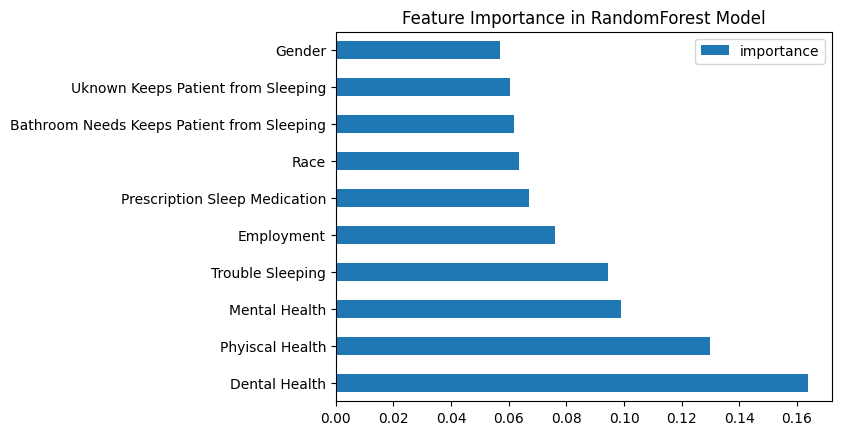

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh')  # Top 10 features
plt.title('Feature Importance in RandomForest Model')
plt.show()